In [2]:
import pandas as pd

In [3]:
import statsmodels.api as sms

In [4]:
df1=pd.read_csv('historical_weather_data_Dehradun_IN.csv')
df2=pd.read_csv('historical_weather_data_Dehradun2_IN.csv')

In [5]:

df = pd.concat([df1, df2], ignore_index=True)


df = df.drop_duplicates()


df.to_csv('merged_weather_data.csv', index=False)

print("Data merged and saved to 'merged_weather_data.csv'")


Data merged and saved to 'merged_weather_data.csv'


In [6]:
import pandas as pd


df = pd.read_csv('merged_weather_data.csv')


df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')


df.to_csv('updated_file.csv', index=False)

print(df.head())


         Date  Min Temperature (C)  Max Temperature (C)
0  01-01-2020                  4.2                 19.1
1  01-02-2020                  5.9                 18.0
2  01-03-2020                  5.5                 20.3
3  01-04-2020                  5.5                 15.8
4  01-05-2020                  3.4                 17.6


In [7]:
df.head()

,Date,Min Temperature (C),Max Temperature (C)
0,01-01-2020,4.2,19.1
1,01-02-2020,5.9,18.0
2,01-03-2020,5.5,20.3
3,01-04-2020,5.5,15.8
4,01-05-2020,3.4,17.6


In [8]:
df.tail()

,Date,Min Temperature (C),Max Temperature (C)
1822,12-27-2024,7.3,14.6
1823,12-28-2024,10.5,14.0
1824,12-29-2024,9.9,21.0
1825,12-30-2024,10.4,19.6
1826,12-31-2024,9.7,18.9


In [9]:
df.isnull().sum()

Date                   0
Min Temperature (C)    0
Max Temperature (C)    0
dtype: int64

In [10]:
df.dropna()

,Date,Min Temperature (C),Max Temperature (C)
0,01-01-2020,4.2,19.1
1,01-02-2020,5.9,18.0
2,01-03-2020,5.5,20.3
3,01-04-2020,5.5,15.8
4,01-05-2020,3.4,17.6
...,...,...,...
1822,12-27-2024,7.3,14.6
1823,12-28-2024,10.5,14.0
1824,12-29-2024,9.9,21.0
1825,12-30-2024,10.4,19.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1827 non-null   object 
 1   Min Temperature (C)  1827 non-null   float64
 2   Max Temperature (C)  1827 non-null   float64
dtypes: float64(2), object(1)
memory usage: 42.9+ KB


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1827 non-null   datetime64[ns]
 1   Min Temperature (C)  1827 non-null   float64       
 2   Max Temperature (C)  1827 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 42.9 KB


In [14]:
df.set_index('Date',inplace=True)

In [15]:
df

,Min Temperature (C),Max Temperature (C)
Date,,
2020-01-01,4.2,19.1
2020-01-02,5.9,18.0
2020-01-03,5.5,20.3
2020-01-04,5.5,15.8
2020-01-05,3.4,17.6
...,...,...
2024-12-27,7.3,14.6
2024-12-28,10.5,14.0
2024-12-29,9.9,21.0


In [16]:
print(df.columns)


Index(['Min Temperature (C)', 'Max Temperature (C)'], dtype='object')


<Axes: xlabel='Date'>

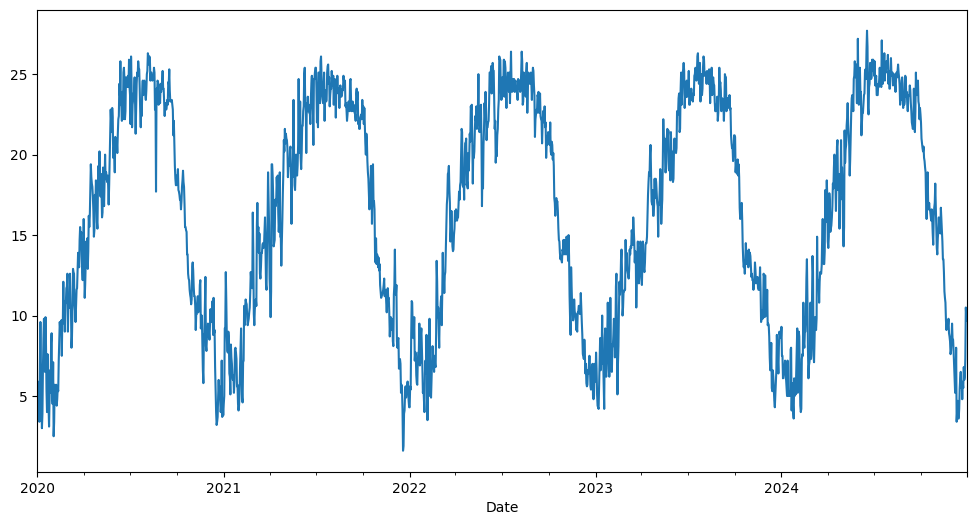

In [17]:
df['Min Temperature (C)'].plot(figsize=(12, 6))

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(series):
    result=adfuller(series)
    print('ADF STATSICS{}'.format(result[0]))
    print('p- value:{}'.format(result[1]))
    print('Lags:{}'.format(result[2]))
    if result[1]<=0.05:
        print("stationary")
    else:
        print("not stationary");

In [20]:
adf_test(df['Min Temperature (C)'])

ADF STATSICS-2.2207763110970813
p- value:0.19879144847949065
Lags:7
not stationary


In [21]:
#use shifting and differnecing
df['MIN_Temperature_First']=df['Min Temperature (C)']-df['Min Temperature (C)'].shift(1)

In [ ]:
#since seasonal data
df['MIN_Temperature12']=df['Min Temperature (C)']-df['Min Temperature (C)'].shift(12)

In [23]:
adf_test(df['MIN_Temperature_First'].dropna())

ADF STATSICS-21.425949959519833
p- value:0.0
Lags:6
stationary


In [24]:
adf_test(df['MIN_Temperature12'].dropna())

ADF STATSICS-5.053626694367708
p- value:1.7363070380178762e-05
Lags:24
stationary


<Axes: xlabel='Date'>

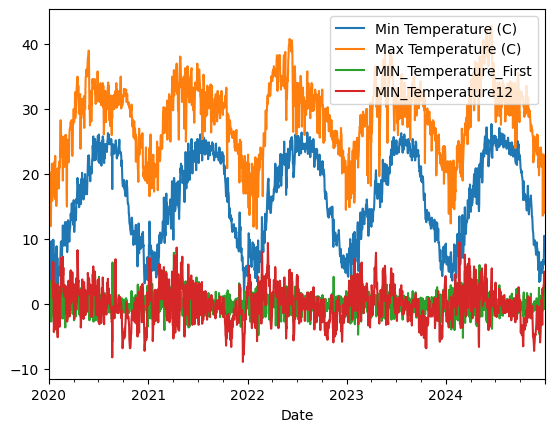

In [25]:
df.plot()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

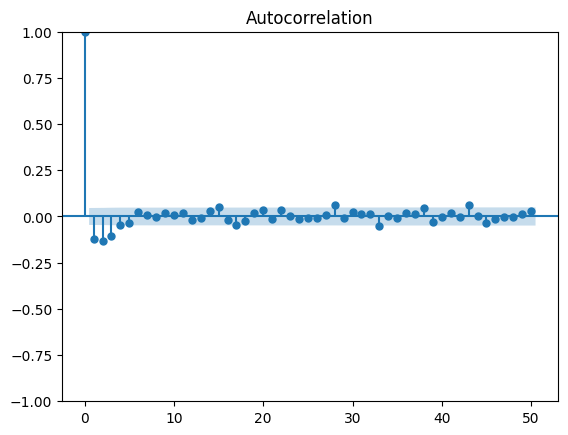

In [27]:
acf=plot_acf(df['MIN_Temperature_First'].dropna(),lags=50)

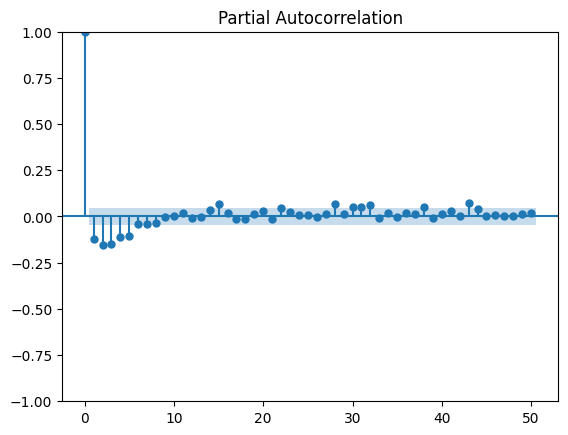

In [28]:
pacf=plot_pacf(df['MIN_Temperature_First'].dropna(),lags=50)

In [77]:
df.columns


Index(['Min Temperature (C)', 'Max Temperature (C)', 'MIN_Temperature_First',
       'MIN_Temperature12'],
      dtype='object')

In [78]:
min_temp_series = df['Min Temperature (C)']


<Axes: xlabel='Date'>

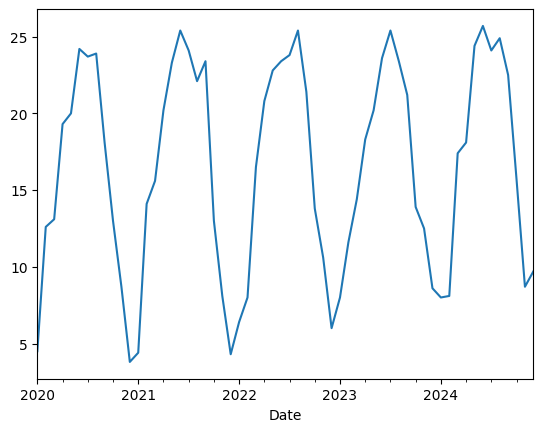

In [79]:
min_temp_series = min_temp_series.asfreq('ME')
min_temp_series.plot()

In [80]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


auto_model = pm.auto_arima(min_temp_series, 
                           seasonal=False,  # Set to True if you want to include seasonal components
                           stepwise=True,   # Use stepwise search to optimize the model
                           trace=True)      # Set to True to see the search progress


print(auto_model.summary())




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=336.436, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=518.222, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=350.439, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=454.378, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=338.217, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=340.382, Time=1.00 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=337.101, Time=1.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=337.601, Time=2.81 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=345.084, Time=0.53 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=336.255, Time=1.80 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=4.05 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=336.081, Time=1.69 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=5.44 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=336.827, Time=2.32 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=5.8

In [81]:
train_ratio = 0.8
split_point = int(len(min_temp_series) * train_ratio)

train_data = min_temp_series[:split_point]
test_data = min_temp_series[split_point:]

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
arima_model = ARIMA(train_data, order=(2,0,2))
arima_fitted = arima_model.fit()
print(arima_fitted.summary())

                                SARIMAX Results                                
Dep. Variable:     Min Temperature (C)   No. Observations:                   48
Model:                  ARIMA(2, 0, 2)   Log Likelihood                -104.529
Date:                 Sat, 04 Jan 2025   AIC                            221.058
Time:                         11:53:49   BIC                            232.285
Sample:                     01-31-2020   HQIC                           225.301
                          - 12-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1814      0.281     57.610      0.000      15.631      16.732
ar.L1          1.7392      0.005    362.022      0.000       1.730       1.749
ar.L2         -0.9998      0.002   -538.070 

In [84]:
forecast_steps = len(test_data)
forecast = arima_fitted.forecast(steps=forecast_steps)


In [85]:
forecast

2024-01-31     6.963908
2024-02-29     8.449916
2024-03-31    11.950715
2024-04-30    16.553438
2024-05-31    21.058212
2024-06-30    24.290948
2024-07-31    25.409345
2024-08-31    24.122357
2024-09-30    20.765933
2024-10-31    16.215319
2024-11-30    11.656827
2024-12-31     8.278571
Freq: ME, Name: predicted_mean, dtype: float64

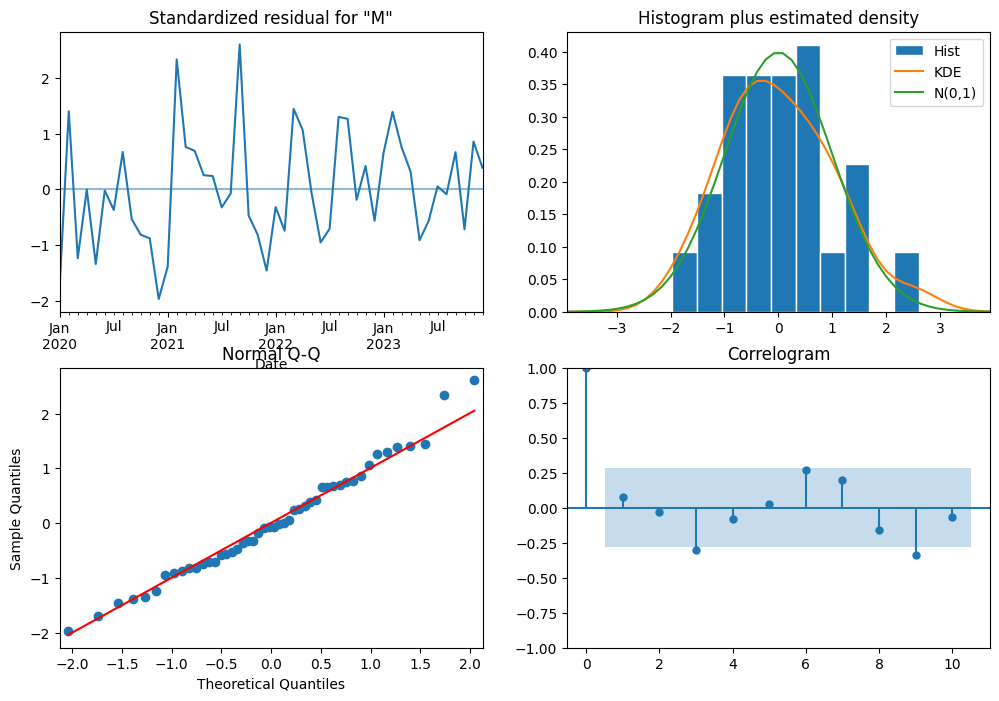

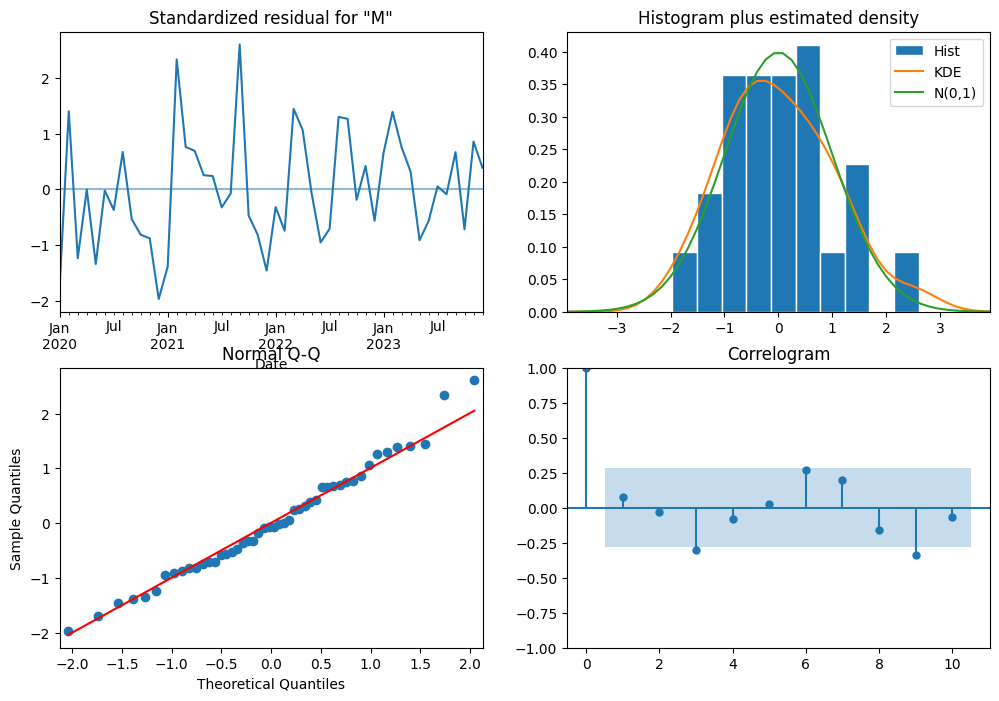

In [86]:
arima_fitted.plot_diagnostics(figsize=(12, 8))

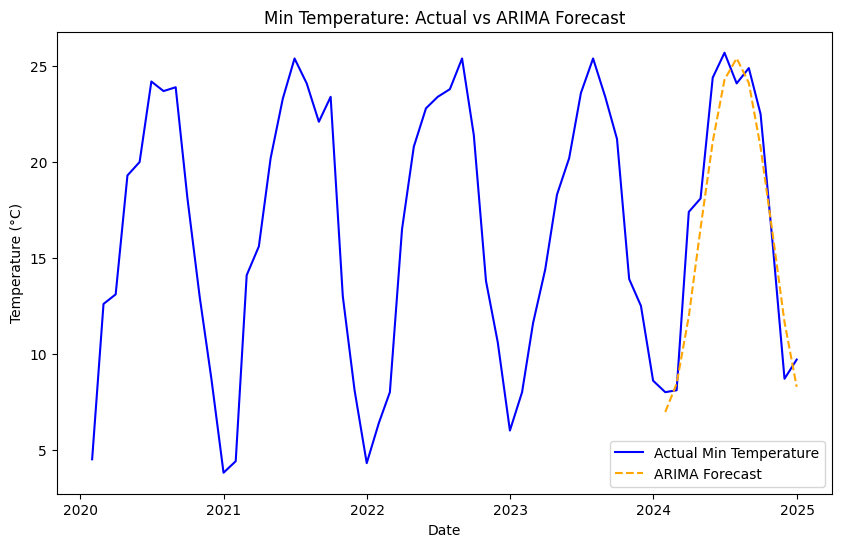

In [87]:
import matplotlib.pyplot as plt

# Plot the full actual min_temp_series (whole dataset)
plt.figure(figsize=(10, 6))
plt.plot(min_temp_series.index, min_temp_series, label="Actual Min Temperature", color='blue')

# Plot the forecasted values only for the test period
plt.plot(test_data.index, forecast, label="ARIMA Forecast", color='orange', linestyle='--')

# Set plot title and labels
plt.title("Min Temperature: Actual vs ARIMA Forecast")
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Show the plot
plt.show()


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.8206105157603956
Root Mean Squared Error (RMSE): 2.2874733119415946


In [100]:
min_temp_series2= df['Min Temperature (C)']


In [101]:
min_temp_series2=min_temp_series2.asfreq('D')


Mean Absolute Error (MAE): 3.5809151558394943


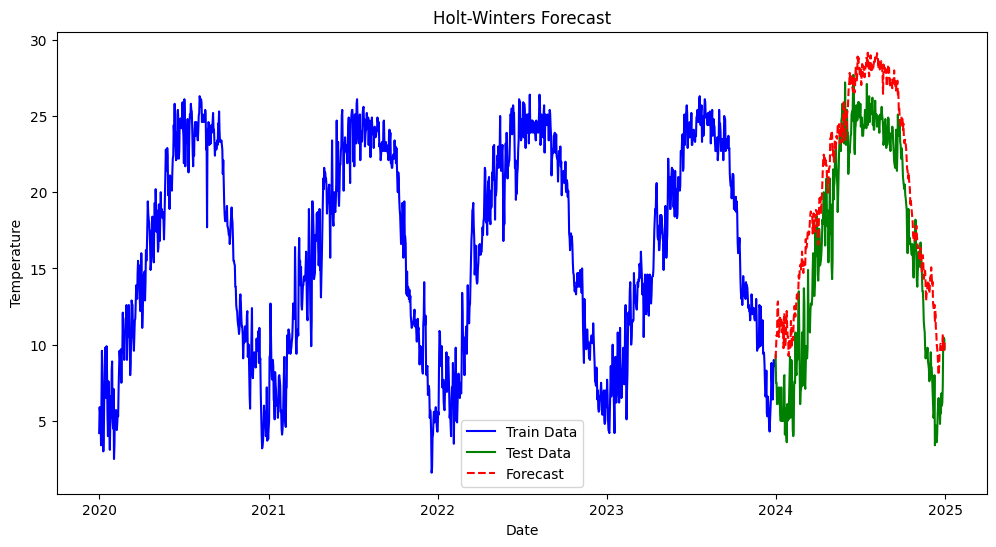

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

train_ratio = 0.8
split_point = int(len(min_temp_series2) * train_ratio)

train_data = min_temp_series2[:split_point]
test_data = min_temp_series2[split_point:]

# Fit the Holt-Winters model
holt_winters_model_min= ExponentialSmoothing(
    train_data,
    trend="add",         
    seasonal="add",      
    seasonal_periods=365 
).fit()


forecast = holt_winters_model_min.forecast(steps=len(test_data))


mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the original data, test data, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Train Data", color="blue")
plt.plot(test_data, label="Test Data", color="green")
plt.plot(forecast, label="Forecast", color="red", linestyle="--")
plt.title("Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [108]:
max_temp_series2= df['Max Temperature (C)']
max_temp_series2=max_temp_series2.asfreq('D')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

train_ratio = 0.8
split_point = int(len(max_temp_series2) * train_ratio)

train_data = max_temp_series2[:split_point]
test_data = max_temp_series2[split_point:]

# Fit the Holt-Winters model
holt_winters_model_max= ExponentialSmoothing(
    train_data,
    trend="add",         
    seasonal="add",      
    seasonal_periods=365 
).fit()


forecast = holt_winters_model_max.forecast(steps=len(test_data))


mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the original data, test data, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Train Data", color="blue")
plt.plot(test_data, label="Test Data", color="green")
plt.plot(forecast, label="Forecast", color="red", linestyle="--")
plt.title("Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()


Mean Absolute Error (MAE): 2.5836709798212265


In [ ]:
import joblib
joblib.dump(holt_winters_model_min, "holt_winters_min_model.joblib")
joblib.dump(holt_winters_model_max, "holt_winters_max_model.joblib")

print("Min Temperature Model and Max Temperature Model have been saved.")